In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from pathlib import Path

In [2]:
X = pd.read_csv('X.csv')
display(X.head(2))
display(X.shape)

,pldel,birattnd,brstate,stoccfipb,mager8,ormoth,mrace,meduc6,dmar,mplbir,...,feduc6,infant_id_0,infant_id_1,dlivord_min,dtotord_min,bord_0,bord_1,brstate_reg,stoccfipb_reg,mplbir_reg
0,1.0,1.0,1,1,5,0.0,1,5.0,1,59.0,...,3.0,11,10,NaN,NaN,NaN,NaN,5,5,1.0
1,1.0,1.0,1,1,3,0.0,1,3.0,1,1.0,...,3.0,35,34,3.0,3.0,2.0,1.0,5,5,5.0


(14477, 52)

In [3]:
print("Missing values per covariate (%)")
(X.isna().sum()/X.shape[0]).sort_values(ascending = False)

Missing values per covariate (%)


feduc6           0.277060
cigar6           0.267044
tobacco          0.257167
drink5           0.250190
alcohol          0.242177
orfath           0.240658
dfageq           0.237342
frace            0.219521
herpes           0.150791
uterine          0.117289
pre4000          0.105340
preterm          0.105340
hemo             0.105340
hydra            0.105340
incervix         0.105340
dtotord_min      0.088900
dlivord_min      0.087035
bord_0           0.087035
bord_1           0.087035
rh               0.082614
adequacy         0.072253
diabetes         0.071838
lung             0.071838
chyper           0.071838
cardiac          0.071838
phyper           0.071838
eclamp           0.071838
renal            0.071838
othermr          0.071838
anemia           0.071838
meduc6           0.057470
nprevistq        0.055744
mpre5            0.041929
ormoth           0.030531
mplbir           0.004075
mplbir_reg       0.004075
birattnd         0.001865
pldel            0.000276
gestat10    

Number of missing values per row distribution


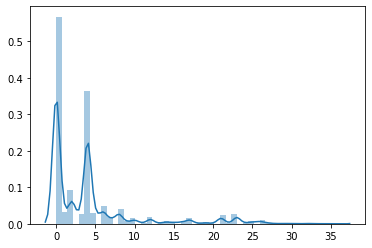

In [4]:
import seaborn as sns
print("Number of missing values per row distribution")
sns.distplot(X.isna().sum(axis = 1))

### We can see that there are rows with many missing values

In [5]:
(X.isna().sum(axis = 1).value_counts().sort_index()/X.shape[0]).cumsum()

0     0.408786
1     0.432894
2     0.498791
3     0.517303
4     0.780134
5     0.802100
6     0.836637
7     0.849416
8     0.878428
9     0.883747
10    0.894591
11    0.896526
12    0.909857
13    0.911377
14    0.916419
15    0.920149
16    0.924846
17    0.936313
18    0.937625
19    0.940319
20    0.941493
21    0.958831
22    0.960213
23    0.979761
24    0.982179
25    0.987290
26    0.993990
27    0.996270
28    0.996823
29    0.997790
30    0.998342
31    0.998549
32    0.999378
33    0.999655
34    0.999931
36    1.000000
dtype: float64

# Remove all rows with more than 10 missing values

In [6]:
keep = X.isna().sum(axis = 1) <= 10
T = pd.read_csv('T.csv')
Y = pd.read_csv('Y.csv')
X = X[keep]
T = T[keep]
Y = Y[keep]

In [7]:
mortality_rate = Y.sum()/Y.shape[0]
true_ate = mortality_rate['mort_0'] - mortality_rate['mort_1']
display(mortality_rate)
print("True ATE")
display(true_ate)

mort_0    0.158212
mort_1    0.134893
dtype: float64

True ATE


0.023318662651532707

In [8]:
print("Missing values per covariate (%)")
(X.isna().sum()/X.shape[0]).sort_values(ascending = False)

Missing values per covariate (%)


feduc6           0.246390
dfageq           0.230639
orfath           0.218902
frace            0.211721
cigar6           0.205312
tobacco          0.195274
drink5           0.186549
alcohol          0.178056
dtotord_min      0.071886
dlivord_min      0.070419
bord_0           0.070419
bord_1           0.070419
adequacy         0.060768
herpes           0.058914
uterine          0.050189
nprevistq        0.046097
mpre5            0.033588
meduc6           0.022701
rh               0.011891
ormoth           0.010578
pre4000          0.008725
incervix         0.008725
hydra            0.008725
preterm          0.008725
hemo             0.008725
mplbir           0.002162
mplbir_reg       0.002162
birattnd         0.001158
pldel            0.000309
chyper           0.000000
crace            0.000000
brstate_reg      0.000000
brstate          0.000000
stoccfipb        0.000000
mager8           0.000000
infant_id_1      0.000000
mrace            0.000000
infant_id_0      0.000000
dmar        

 # Let's examine the covariates with high probabilty to be NA 


In [9]:
# Let's examine the covariates with high probabilty to be NA 
keys = ["feduc6",          
"dfageq",           
"orfath",           
"frace",        
"cigar6",           
"tobacco",          
"drink5",           
"alcohol" ]

cov = {'adequacy': 'adequacy of care',
 'alcohol': 'risk factor, alcohol use',
 'anemia': 'risk factor, Anemia',
 'birattnd': 'medical person attending birth',
 'birmon': 'birth month Jan-Dec',
 'bord_0': 'birth order of lighter twin',
 'bord_1': 'birth order of heavier twin',
 'brstate': 'state of residence NCHS',
 'brstate_reg': 'US census region of brstate',
 'cardiac': 'risk factor, Cardiac',
 'chyper': 'risk factor, Hypertension, chronic',
 'cigar6': 'num of cigarettes /day, quantiled',
 'crace': 'race of child',
 'csex': 'sex of child',
 'data_year': 'year: 1989, 1990 or 1991',
 'dfageq': 'octile age of father',
 'diabetes': 'risk factor, Diabetes',
 'dlivord_min': 'number of live births before twins',
 'dmar': 'married',
 'drink5': 'num of drinks /week, quantiled',
 'dtotord_min': 'total number of births before twins',
 'eclamp': 'risk factor, Eclampsia',
 'feduc6': 'education category',
 'frace': 'dad race',
 'gestat10': 'gestation 10 categories',
 'hemo': 'risk factor Hemoglobinopathy',
 'herpes': 'risk factor, Herpes',
 'hydra': 'risk factor Hvdramnios/Oliqohvdramnios',
 'incervix': 'risk factor, Incompetent cervix',
 'infant_id_0': 'infant id of lighter twin in original df',
 'infant_id_1': 'infant id of heavier twin in original df',
 'lung': 'risk factor, Lung',
 'mager8': 'mom age',
 'meduc6': 'mom education',
 'mplbir': 'mom place of birth',
 'mplbir_reg': 'US census region of mplbir',
 'mpre5': 'trimester prenatal care begun, 4 is none',
 'mrace': 'mom race',
 'nprevistq': 'quintile number of prenatal visits',
 'orfath': 'dad hispanic',
 'ormoth': 'mom hispanic',
 'othermr': 'risk factor, Other Medical Risk Factors',
 'phyper': 'risk factor, Hypertension, preqnancy-associated',
 'pldel': 'place of delivery',
 'pre4000': 'risk factor, Previous infant 4000+ grams',
 'preterm': 'risk factor, Previos pre-term or small',
 'renal': 'risk factor, Renal disease',
 'rh': 'risk factor, RH sensitization',
 'stoccfipb': 'state of occurence FIPB',
 'stoccfipb_reg': 'US census region of stoccfipb',
 'tobacco': 'risk factor, tobacco use',
 'uterine': 'risk factor, Uterine bleeding'}


cov_type = {'adequacy': 'cat',
 'alcohol': 'bin',
 'anemia': 'bin',
 'birattnd': 'cat',
 'birmon': 'cyc',
 'bord': 'bin',
 'brstate': 'cat',
 'brstate_reg': 'cat', 
 'cardiac': 'bin',
 'chyper': 'bin',
 'cigar6': 'cat',
 'crace': 'cat',
 'csex': 'bin',
 'data_year': 'cat',
 'dfageq': 'cat',
 'diabetes': 'bin',
 'dlivord_min': 'ord',
 'dmar': 'bin',
 'drink5': 'cat',
 'dtotord_min': 'ord',
 'eclamp': 'bin',
 'feduc6': 'cat',
 'frace': 'cat',
 'gestat10': 'cat',
 'hemo': 'bin',
 'herpes': 'bin',
 'hydra': 'bin',
 'incervix': 'bin',
 'infant_id': 'index do not use',
 'lung': 'bin',
 'mager8': 'cat',
 'meduc6': 'cat',
 'mplbir': 'cat',
 'mpre5': 'cat',
 'mrace': 'cat',
 'nprevistq': 'cat',
 'orfath': 'cat',
 'ormoth': 'cat',
 'othermr': 'bin',
 'phyper': 'bin',
 'pldel': 'cat',
 'pre4000': 'bin',
 'preterm': 'bin',
 'renal': 'bin',
 'rh': 'bin',
 'stoccfipb': 'cat',
 'stoccfipb_reg': 'cat',
 'tobacco': 'bin',
 'uterine': 'bin'}



for key in keys:
    print(F"{key} : {cov[key]} : {cov_type[key]} \n")



feduc6 : education category : cat 

dfageq : octile age of father : cat 

orfath : dad hispanic : cat 

frace : dad race : cat 

cigar6 : num of cigarettes /day, quantiled : cat 

tobacco : risk factor, tobacco use : bin 

drink5 : num of drinks /week, quantiled : cat 

alcohol : risk factor, alcohol use : bin 



In [10]:
for k,v in cov_type.items():
    if v in ['cat','bin']:
        try:
            print(k )
            print(X[k].value_counts())
        except:
            continue

# cat_cols = [key for key in cov_type.keys() if cov_type[key] == 'cat' and key not in ['brstate','stoccfipb','mplbir']]
# counter = 0
# for col in cat_cols:
#     counter +=len(X[col].unique())
#     print(col, len(X[col].unique()))
# print(counter)


adequacy
1.0    8210
2.0    2776
3.0    1178
Name: adequacy, dtype: int64
alcohol
0.0    10283
1.0      362
Name: alcohol, dtype: int64
anemia
0.0    12460
1.0      491
Name: anemia, dtype: int64
birattnd
1.0    12561
2.0      281
5.0       64
3.0       25
4.0        5
Name: birattnd, dtype: int64
bord
brstate
5     1490
14     722
10     705
36     665
44     633
39     626
23     602
33     585
34     474
11     427
47     377
31     348
26     332
22     327
1      311
43     310
15     268
41     265
25     237
19     233
50     227
3      227
6      208
24     196
48     163
4      161
17     147
18     139
16     132
45     131
21     130
38     129
7      109
29      96
49      93
32      81
12      71
28      66
30      58
13      53
27      47
20      47
9       43
8       43
40      41
42      40
37      39
2       25
51      22
35      21
46      17
59       6
57       4
55       2
Name: brstate, dtype: int64
brstate_reg
4    2557
2    2484
8    1880
1    1565
6    1070
5   

In [13]:
X = X.drop(columns = ['data_year','mplbir','stoccfipb','brstate','infant_id_0','infant_id_1'])

In [17]:
X.to_csv('../3_clean_data/X.csv', index = False)
T.to_csv('../3_clean_data/T.csv', index = False)
Y.to_csv('../3_clean_data/Y.csv', index = False)